In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Data Importation
df = pd.read_csv('free_throws.csv', sep=',')

# Plan
1. Data structures Analysis
    1. The first five rows
    2. Type of columns and missing values
    3. Duplicated rows
    4. Is that dataset is complete for those years?
    5. Is every team is represented for every season?    
2. Discover and visualize the data
    1. Univariate analysis
    2. Attempt analysis
        1. Analyze per seasons
        2. Analyze per period
        3. Analyze per minutes left in a period
        4. Analyze per minutes left in a game
    3. Shooting Percentages analysis   
        1. Analyze per seasons
        2. Analyze per period
        3. Analyze per minutes left in a period
        4. Analyze per minutes left in a game
    4. Analyze by players
        1. Overview statistics
        
    

# 1. Data structures Analysis

## 1.A The first five rows

In [3]:
# Top 5 rows
df.head(5)

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18


_The dataframe containing NBA free throws informations during a match._ 

-  This is a **long format** data where each row is an attempt for free throws during a match.
 - There is **11 features** for each attempt of free throws: end_result, game, game_id, period, play, player, playoffs, score, season, shot_made, and time.

## 1.B Shape of the data, Type of columns and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618019 entries, 0 to 618018
Data columns (total 11 columns):
end_result    618019 non-null object
game          618019 non-null object
game_id       618019 non-null float64
period        618019 non-null float64
play          618019 non-null object
player        618019 non-null object
playoffs      618019 non-null object
score         618019 non-null object
season        618019 non-null object
shot_made     618019 non-null int64
time          618019 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 51.9+ MB


- There is **618'019 rows** and **11 columns** in this dataframe.
- There is **8 object columns**: *end_result, end_result, game, play, player, playoffs, score, season, shot_made, and time*
- There is **2 float columns**: *game_id, period*  
 - *game id and period are not real float columns*
- There is **1 integer column**: *shot_made*
- There is **no missing values** at all for all features.

In [5]:
# Change type of game_id & period for int32
## Change type of shot_made for int32 
df = df.astype({"game_id" : 'int32' , "period" : 'int32' , "shot_made" : 'int32'})

## 1.C Duplicated rows? 

In [6]:
df[df.duplicated(keep= False) ==  True]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
591176,108 - 102,MIN - LAC,400828632,2,Zach LaVine misses technical free throw,Zach LaVine,regular,34 - 37,2015 - 2016,0,8:10
591177,108 - 102,MIN - LAC,400828632,2,Zach LaVine misses technical free throw,Zach LaVine,regular,34 - 37,2015 - 2016,0,8:10


There is one row that is duplicated one times.
<br> After research, we found that it is probably **an error** so we will **delete one** of theses rows.

In [7]:
df_dedup = df[df.duplicated(keep= 'first') ==  False]

In [8]:
df_dedup.shape

(618018, 11)

## 1.D Is dataset is complete for thoses years?

In [9]:
# Nb of games
df_dedup.groupby(["season", "playoffs"]).agg({ "game_id": pd.Series.nunique})

game_id
season      playoffs         
2006 - 2007 playoffs       79
            regular      1218
2007 - 2008 playoffs       84
            regular      1227
2008 - 2009 playoffs       85
            regular      1231
2009 - 2010 playoffs       82
            regular      1231
2010 - 2011 playoffs       81
            regular      1231
2011 - 2012 playoffs       84
            regular       991
2012 - 2013 playoffs       85
            regular      1226
2013 - 2014 playoffs       89
            regular      1228
2014 - 2015 playoffs       81
            regular      1228
2015 - 2016 playoffs       86
            regular      1227

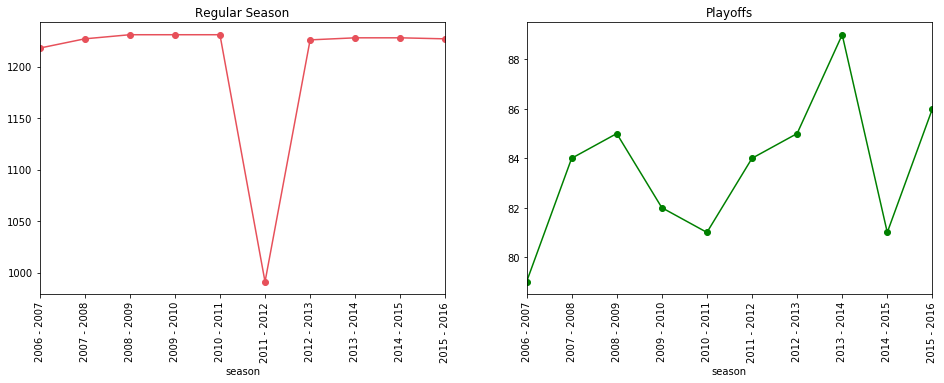

In [10]:
games = df_dedup.drop_duplicates("game_id").groupby(["season", "playoffs"]).size().unstack()
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
games.regular.plot(marker="o", rot=90 , title="Regular Season", color="#e7505a", ax=axarr[0])
games.playoffs.plot(marker="o", rot=90, title="Playoffs" , color="#008000", ax=axarr[1])
plt.subplots_adjust(hspace=.3)

According to my research, a **regular season** is about 1230 games per season.
- We can see that there is less games during **regular season 2011-2012 (991)**. 
    - *I have checked if something special happened and I have find that there was a lock-out and regular season starts at Christmas.*
- We can check that in **season 2009-2010** and **season 2010-2011** there is **1231 matchs**. Maybe there is ALL STAR GAME for thoses seasons.
- There is less games than expected for **seasons 2006-2007** and so on, we can suppose that it is missing values and that it was not games without free throws.

There are not expected number of games for playoffs. 
<bv> *This is a best of seven mode*

## 1.E Is every team is represented for every season?
<br> _We expect to have 30 teams for regular season and 16 for playoffs seasons._

In [11]:
# Creation of features team dom and team visit
df_dedup["dom"] = df_dedup["game"].str.split(' - ').str[0]
df_dedup["visit"] = df_dedup["game"].str.split(' - ').str[1]

C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
dom = df_dedup[["season", "playoffs","dom"]]
dom = dom.rename(columns={"dom": "team"})
visit = df_dedup[["season", "playoffs","visit"]]
visit = visit.rename(columns={"visit": "team"})

In [13]:
all_teams = pd.concat([dom, visit]).drop_duplicates()
del dom,visit

In [14]:
# Nb of games
all_teams[["season", "playoffs","team"]].groupby(["season", "playoffs"]).agg({ "team": pd.Series.nunique})

team
season      playoffs      
2006 - 2007 playoffs    16
            regular     32
2007 - 2008 playoffs    16
            regular     32
2008 - 2009 playoffs    16
            regular     32
2009 - 2010 playoffs    16
            regular     32
2010 - 2011 playoffs    16
            regular     32
2011 - 2012 playoffs    16
            regular     32
2012 - 2013 playoffs    16
            regular     30
2013 - 2014 playoffs    16
            regular     30
2014 - 2015 playoffs    16
            regular     30
2015 - 2016 playoffs    16
            regular     30

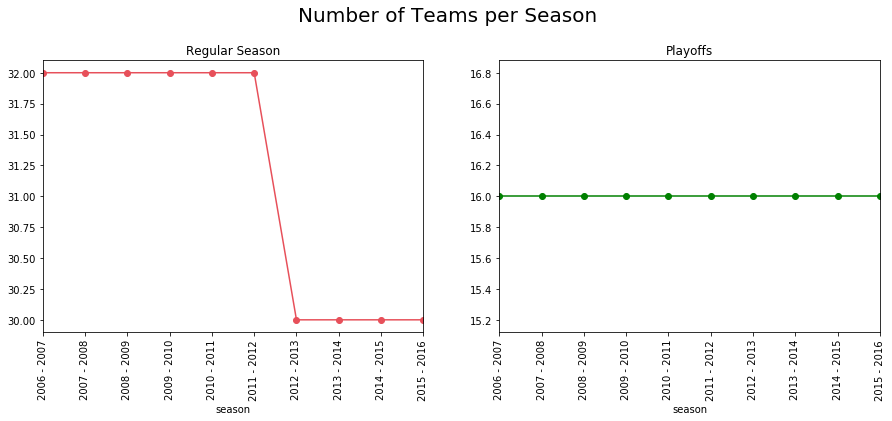

In [15]:
list_teams = all_teams.groupby(["season", "playoffs"]).size() \
          .unstack()
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle("Number of Teams per Season", y=1.03, fontsize=20)

list_teams.regular.plot(marker="o", rot=90, title="Regular Season", color="#e7505a", ax=ax[0])
list_teams.playoffs.plot(marker="o", rot=90, title="Playoffs" , color="#008000", ax=ax[1])

- Between **2006 and 2012** there is **32 teams**.
    - We can suppose that is because there is **ALL STAR GAMES** for those seasons and that they are tagged as regular games.

In [16]:
regular = all_teams[all_teams["playoffs"] == 'regular'][["season","team"]]
del all_teams
one_hot = pd.get_dummies(regular['season'])
regular_season = regular.drop('season',axis = 1)
regular_season = pd.concat([regular_season, one_hot], axis=1)
all_teams = regular_season.groupby(['team']).agg('sum')

In [17]:
# List of teams who are not present in this season
col = all_teams.columns
for i in range(0,len(col)):
    print(col[i] , all_teams.index[all_teams[col[i]] == 0])

2006 - 2007 Index(['BKN', 'OKC'], dtype='object', name='team')
2007 - 2008 Index(['BKN', 'OKC'], dtype='object', name='team')
2008 - 2009 Index(['BKN', 'SEA'], dtype='object', name='team')
2009 - 2010 Index(['BKN', 'SEA'], dtype='object', name='team')
2010 - 2011 Index(['BKN', 'SEA'], dtype='object', name='team')
2011 - 2012 Index(['BKN', 'SEA'], dtype='object', name='team')
2012 - 2013 Index(['EAST', 'NJ', 'SEA', 'WEST'], dtype='object', name='team')
2013 - 2014 Index(['EAST', 'NJ', 'SEA', 'WEST'], dtype='object', name='team')
2014 - 2015 Index(['EAST', 'NJ', 'SEA', 'WEST'], dtype='object', name='team')
2015 - 2016 Index(['EAST', 'NJ', 'SEA', 'WEST'], dtype='object', name='team')


In [83]:
df_dedup[["season","game","end_result","playoffs"]].loc[(df_corr['dom'] == 'EAST') |  (df_corr['visit'] == 'EAST')].drop_duplicates()

,season,game,end_result,playoffs
40823,2006 - 2007,EAST - WEST,132 - 153,all-star
106286,2007 - 2008,EAST - WEST,134 - 128,all-star
172287,2008 - 2009,EAST - WEST,119 - 146,all-star
236915,2009 - 2010,EAST - WEST,141 - 139,all-star
304296,2010 - 2011,EAST - WEST,143 - 148,all-star
350301,2011 - 2012,WEST - EAST,152 - 149,all-star


- **NJ** disappeared in **2012** and **BKN appeared in **2012**.
    - *after research, I have found that NJ moved in BKN.*
- **OKC** disappeared in **2008** and **SEA** appeared in **2008**.
    - *after research, I have found that OKC moved in SEA.*
- **From 2006 to 2012**, there are **32 teams** 
    - **only 30 from season** + **ALL STAR GAME:  WEST vs EST** 
- **From 2012 to 2016**, there are **30 teams** from season 

In [19]:
# Recoding playoffs = 'playoffs' for ALL STAR GAMES
df_corr = df_dedup
df_corr["playoffs"].loc[(df_corr['dom'] == 'EAST') |  (df_corr['visit'] == 'EAST')] = 'all-star'

C:\Users\Public\Env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df_corr[["season","game","end_result","playoffs"]].loc[(df_corr['dom'] == 'EAST') |  (df_corr['visit'] == 'EAST')].drop_duplicates()

,season,game,end_result,playoffs
40823,2006 - 2007,EAST - WEST,132 - 153,all-star
106286,2007 - 2008,EAST - WEST,134 - 128,all-star
172287,2008 - 2009,EAST - WEST,119 - 146,all-star
236915,2009 - 2010,EAST - WEST,141 - 139,all-star
304296,2010 - 2011,EAST - WEST,143 - 148,all-star
350301,2011 - 2012,WEST - EAST,152 - 149,all-star


# 2. Discover and visualize the data

## 2.A Univariate Analysis

In [21]:
df_corr.columns

Index(['end_result', 'game', 'game_id', 'period', 'play', 'player', 'playoffs',
       'score', 'season', 'shot_made', 'time', 'dom', 'visit'],
      dtype='object')

In [22]:
graph = pd.Series(data= df_corr["season"].value_counts(), index =df_corr["season"].value_counts().index)
graph = graph.sort_index(ascending = True)

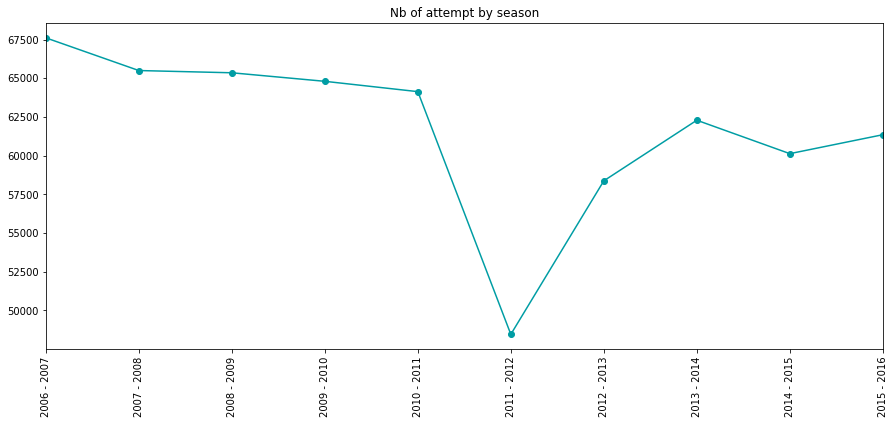

In [23]:
graph.plot(marker="o", rot=90, title="Nb of attempt by season", color="#009da4" , figsize=(15, 6))

In season **2011-2012**, there is **less games** than other season and this is why there is **less attempt** of free 

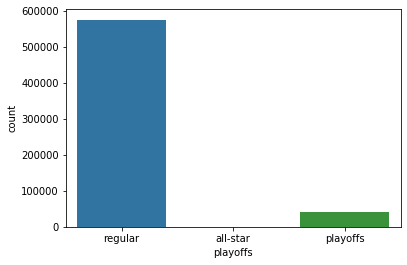

In [24]:
sns.countplot(x = "playoffs" , data=df_corr  )

**Most of attempt** in this dataset are from **regular season**.

In [25]:
df_corr["end_result"].value_counts()

101 - 108    1294
100 - 107    1275
104 - 96     1267
94 - 99      1197
89 - 102     1167
             ... 
64 - 77        19
77 - 66        18
75 - 104       17
73 - 71        14
61 - 78        13
Name: end_result, Length: 2725, dtype: int64

There is nothing particular information here.

In [26]:
df_corr["period"].value_counts()

4    186280
2    154217
3    154108
1    116962
5      5439
6       838
7       150
8        24
Name: period, dtype: int64

There is some values not expected like periode > 4.
It is probably overtime.

In [27]:
df_corr["game"].value_counts()

LAL - DEN      1554
UTAH - DEN     1457
UTAH - LAL     1447
CLE - BOS      1441
IND - MIA      1439
               ... 
SEA - CHI        73
SEA - CLE        73
SEA - PHI        71
TOR - SEA        70
WEST - EAST      38
Name: game, Length: 988, dtype: int64

There is nothing particular information here.

In [28]:
df_corr["play"].value_counts()

LeBron James makes free throw 2 of 2                    2598
LeBron James makes free throw 1 of 2                    2383
Kevin Durant makes free throw 2 of 2                    2140
Kevin Durant makes free throw 1 of 2                    2088
Dwight Howard makes free throw 2 of 2                   1993
                                                        ... 
Ron Artest makes technical free throw                      1
Jamal Crawford makes free throw clear path 2 of 2          1
Andrew Bogut misses flagrant free throw 2 of 2             1
Danilo Gallinari misses free throw clear path 1 of 2       1
Will Conroy misses free throw                              1
Name: play, Length: 10482, dtype: int64

We can recognize some pattern that will be useful for recoding and analyzing.

In [29]:
df_corr["player"].value_counts()

LeBron James       8001
Dwight Howard      7728
Kevin Durant       6030
Kobe Bryant        5594
Dwyane Wade        5594
                   ... 
Branden Dawson        1
Sherron Collins       1
Grant Jerrett         1
Adonis Thomas         1
D.J. Stephens         1
Name: player, Length: 1098, dtype: int64

There is 1'098 players that have try attempt of free throws.
We can see that Lebron James is the player who tried the most and that there is several players that have just tried it one time.

In [30]:
df_corr["shot_made"].value_counts()

1    467689
0    150329
Name: shot_made, dtype: int64

There is more attempt succeed than missed.

In [31]:
df_corr["time"].value_counts()

0:00     2666
0:02     2580
0:01     2537
0:03     2444
1:00     2418
         ... 
11:53      31
11:55      14
11:57       7
5:40        2
4:25        2
Name: time, Length: 534, dtype: int64

# 2.B Attempt Analysis

### a. Analyze per season 

In [84]:
# Sum of nb of Free Throws per Season
free_throws = df_corr.groupby(["season", "playoffs"]).size().unstack()
free_throws

playoffs,all-star,playoffs,regular
season,,,
2006 - 2007,22.0,4116.0,63474.0
2007 - 2008,28.0,4384.0,61088.0
2008 - 2009,40.0,4455.0,60860.0
2009 - 2010,35.0,4447.0,60322.0
2010 - 2011,54.0,4185.0,59898.0
2011 - 2012,38.0,3972.0,44449.0
2012 - 2013,NaN,4078.0,54298.0
2013 - 2014,NaN,4389.0,57901.0
2014 - 2015,NaN,4049.0,56082.0


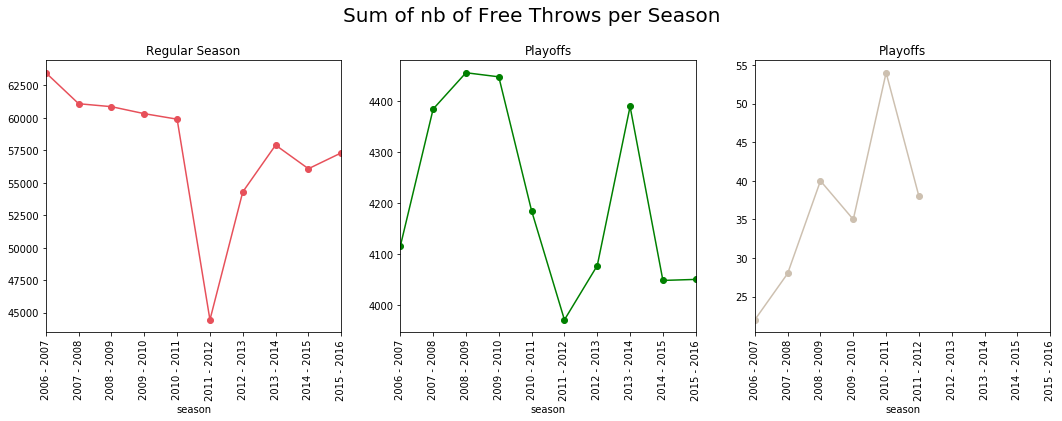

In [33]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
plt.suptitle("Sum of nb of Free Throws per Season", y=1.03, fontsize=20)
free_throws["regular"].plot(marker="o", rot=90, title="Regular Season", color="#e7505a", ax=ax[0])
free_throws["playoffs"].plot(marker="o", rot=90, title="Playoffs" , color="#008000", ax=ax[1])
free_throws["all-star"].plot(marker="o", rot=90, title="Playoffs" , color="#cdc0b0", ax=ax[2])
plt.subplots_adjust(hspace=.3)

- As expected, there is **less free throws** in season **2011-2012** because of fewer matches
- We can see that for **Regular season**, it seems to be a **trend that sum of free throws per season decreased**.
- There is **not a clear trend** for sum of free throws per season **during playoffs**.

In [85]:
# Mean of nb of Free Throws by games per Season
games = df_corr[["season","playoffs","game_id"]].drop_duplicates().groupby(["season", "playoffs"]).size().unstack()
avg_ft = free_throws/games
avg_ft

playoffs,all-star,playoffs,regular
season,,,
2006 - 2007,22.0,52.101266,52.156122
2007 - 2008,28.0,52.190476,49.827080
2008 - 2009,40.0,52.411765,49.479675
2009 - 2010,35.0,54.231707,49.042276
2010 - 2011,54.0,51.666667,48.697561
2011 - 2012,38.0,47.285714,44.897980
2012 - 2013,NaN,47.976471,44.288744
2013 - 2014,NaN,49.314607,47.150651
2014 - 2015,NaN,49.987654,45.669381


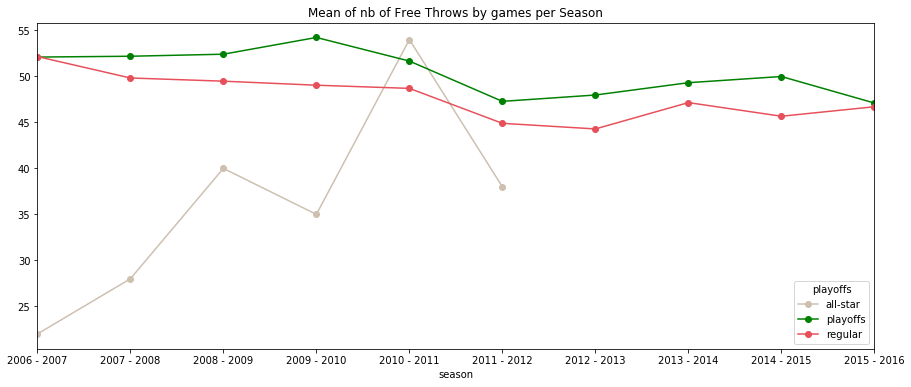

In [35]:
avg_ft.plot.line(figsize=(15, 6) , color=['#cdc0b0','#008000','#e7505a'],  marker="o"
    , title="Mean of nb of Free Throws by games per Season" 
    )


- The **mean of number of free throws by games per season** is **higher** during **playoffs** than for **regular** season games. 
- We can see a trend for **decreasing** of **mean of number of free throws by games per season** for **regular** season and **playoffs**.
    - **Especialy between 2009-2012**: 54 free throws per games -> 47 free throws per games
        - *After a research, I have found that there is a change of rules from season 2011-2012*

In [36]:
ft_per_games = pd.DataFrame({'nb_of_ft' : df_corr.groupby( ["season","playoffs","game_id"] ).size()}).reset_index()

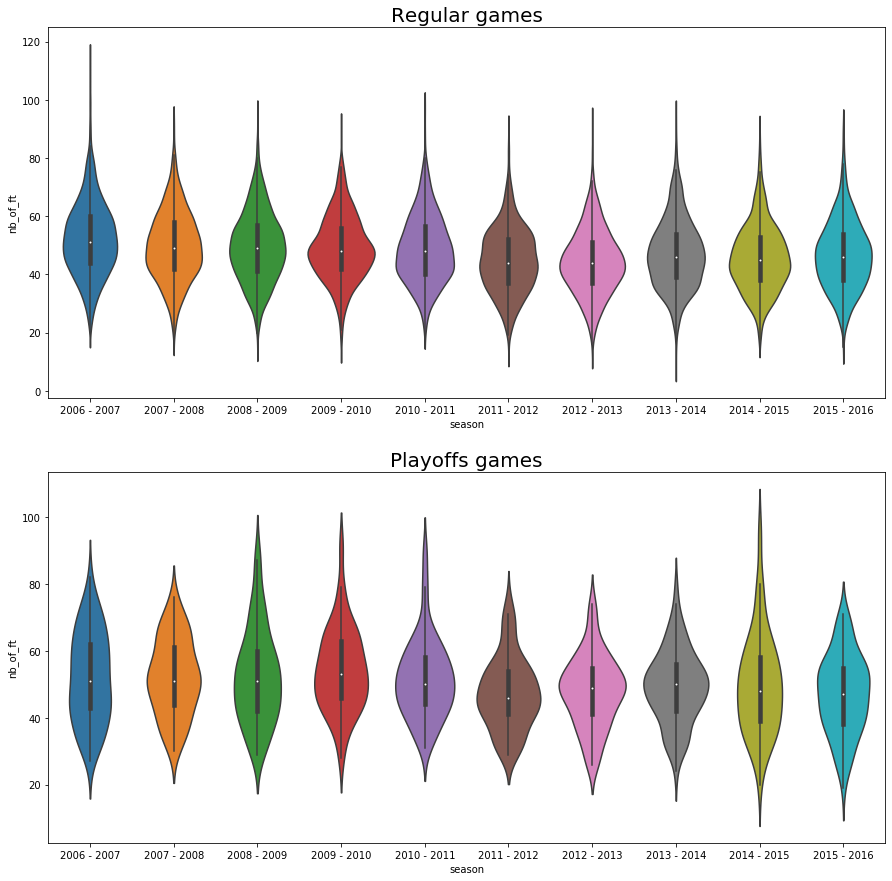

In [37]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].set_title("Regular games", fontsize=20)
ax[1].set_title("Playoffs games", fontsize=20)
sns.violinplot(ax=ax[0] , x='season',y='nb_of_ft',data=ft_per_games.loc[ft_per_games["playoffs"] == 'regular'])
sns.violinplot(ax=ax[1] , x='season',y='nb_of_ft',data=ft_per_games.loc[ft_per_games["playoffs"] == 'playoffs'])

- We can see a trend for **decreasing** of **mean of number of free throws by games per season** for **regular** season and **playoffs**.

### b. Analyze per period

In [38]:
# Mean of nb of free throws per period
ft_per_period = df_corr.groupby( ["period","playoffs"] ).size().unstack()
games_per_period = df_corr[["period","playoffs","game_id"]].drop_duplicates().groupby(["period", "playoffs"]).size().unstack()
avg_ft_per_period = ft_per_period/games_per_period
avg_ft_per_period

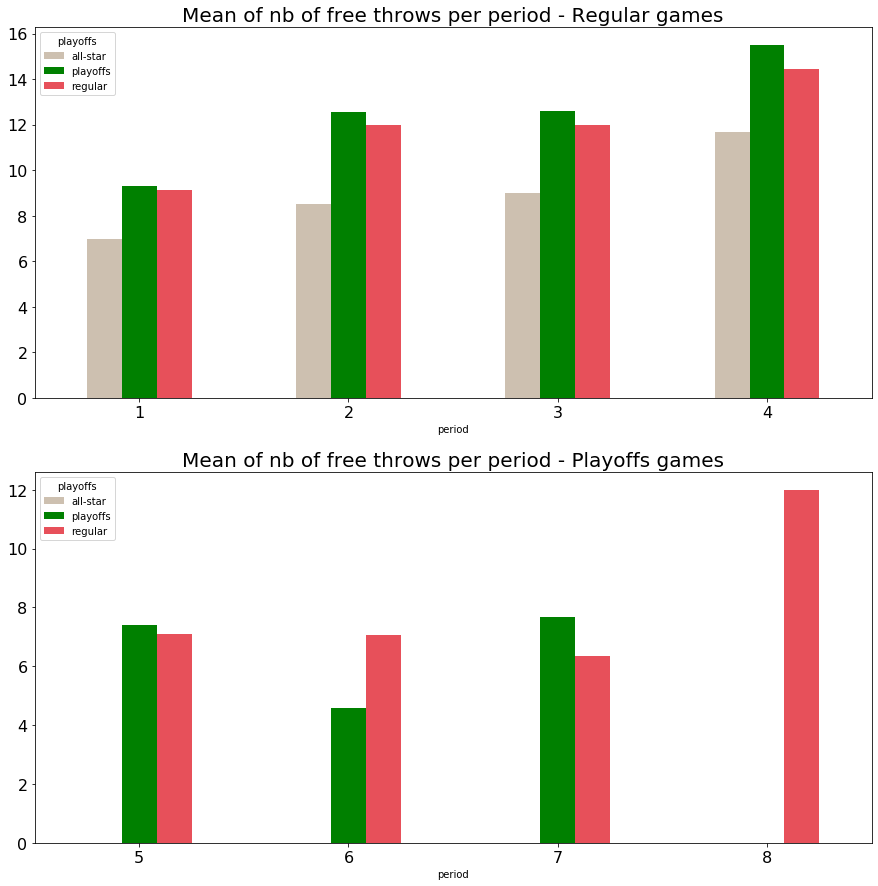

In [40]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].set_title("Mean of nb of free throws per period - Regular games", fontsize=20)
ax[1].set_title("Mean of nb of free throws per period - Playoffs games", fontsize=20)
avg_ft_per_period.loc[avg_ft_per_period.index <= 4].plot.bar(
     color=['#cdc0b0','#008000','#e7505a']
    ,fontsize=16
    ,rot=0
    ,ax=ax[0]                                                         
                                                )
avg_ft_per_period.loc[avg_ft_per_period.index > 4].plot.bar(
     color=['#cdc0b0','#008000','#e7505a']
    ,fontsize=16
    ,rot=0
    ,ax=ax[1]                                                         
                                                )

- The **Mean of nb of free throws per period** is **higher** during **playoffs** than for **regular** season games. 
- We can see a **trend for increasing** **Mean of nb of free throws per period** for **regular** season, **playoffs** and **allstar** games.

In [41]:
ft_per_period = pd.DataFrame({'nb_of_ft' : df_corr.groupby( ["period","playoffs","game_id"] ).size()}).reset_index()

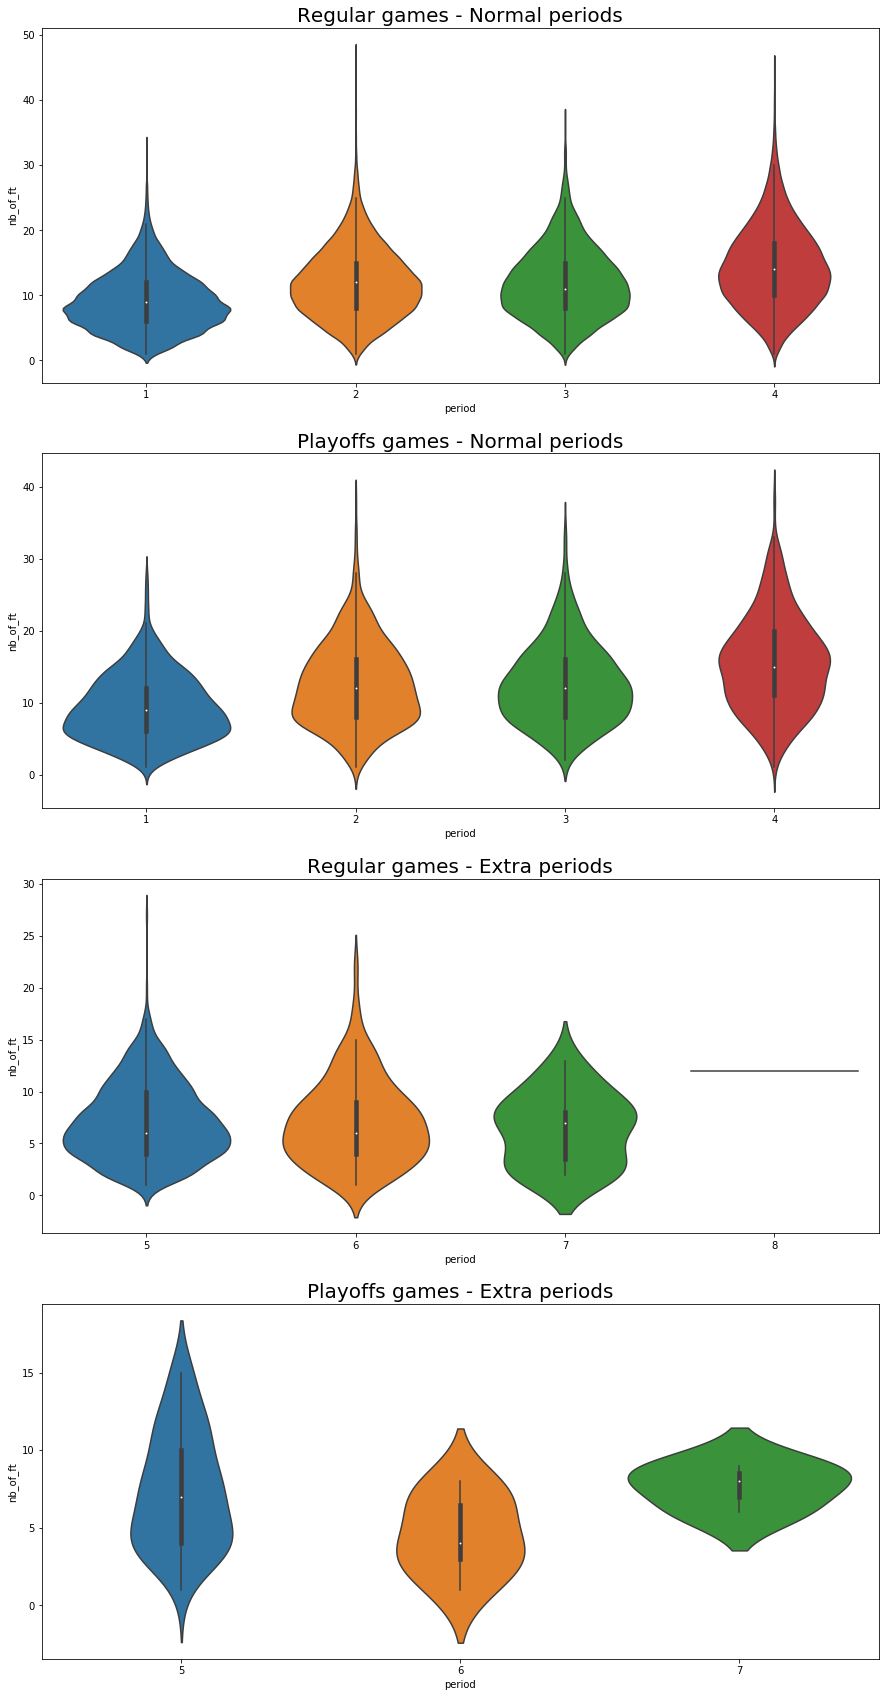

In [42]:
fig, ax = plt.subplots(4,1, figsize=(15,30))
ax[0].set_title("Regular games - Normal periods", fontsize=20)
ax[1].set_title("Playoffs games - Normal periods", fontsize=20)
ax[2].set_title("Regular games - Extra periods", fontsize=20)
ax[3].set_title("Playoffs games - Extra periods", fontsize=20)
sns.violinplot(ax=ax[0] , x='period',y='nb_of_ft',data=ft_per_period.loc[(ft_per_period["playoffs"] == 'regular') & (ft_per_period["period"] <= 4)])
sns.violinplot(ax=ax[1] , x='period',y='nb_of_ft',data=ft_per_period.loc[(ft_per_period["playoffs"] == 'playoffs') & (ft_per_period["period"] <= 4)])
sns.violinplot(ax=ax[2] , x='period',y='nb_of_ft',data=ft_per_period.loc[(ft_per_period["playoffs"] == 'regular') & (ft_per_period["period"] > 4)])
sns.violinplot(ax=ax[3] , x='period',y='nb_of_ft',data=ft_per_period.loc[(ft_per_period["playoffs"] == 'playoffs') & (ft_per_period["period"] > 4)])

- We can see that there is **more free throws** as the **game comes closer** in **Normal periods** for **regular** season and **playoffs**.
- There is **less free throws** during **extra periods** than **normal periods**.
    - *Normal period is 12 minutes and Extra period is 5 minutes long*

In [43]:
### Creation of a function to calculate avg nb of free throws per minute in a period
def per_min(x,y):
    if y <= 4 and x > 0:
        return x/12
    elif y > 4 and x > 0:
        return x/5
    else:
        np.nan

In [44]:
# Mean of nb of free throws by minutes per period
avg_ft_per_min = avg_ft_per_period.reset_index()  
tr = ["all-star","playoffs","regular"]
for i in range(0,3):
    avg_ft_per_min[tr[i]] = avg_ft_per_min.apply(lambda x: per_min(x[tr[i]],x['period']),axis=1)
avg_ft_per_min.index = avg_ft_per_min["period"]
del avg_ft_per_min["period"]

avg_ft_per_min

playoffs,all-star,playoffs,regular
period,,,
1,0.583333,0.777378,0.760452
2,0.708333,1.046850,0.997002
3,0.750000,1.050000,0.997671
4,0.972222,1.291166,1.202802
5,NaN,1.478431,1.419916
6,NaN,0.914286,1.414035
7,NaN,1.533333,1.270000
8,NaN,NaN,2.400000


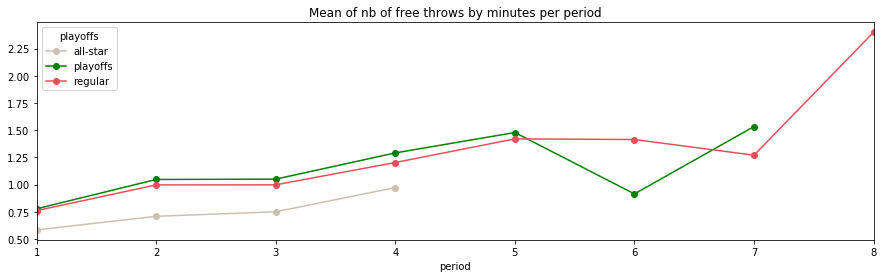

In [45]:
avg_ft_per_min.plot.line(
    figsize=(15, 4) 
    , color=['#cdc0b0','#008000','#e7505a'],  marker="o" 
    , title="Mean of nb of free throws by minutes per period" 
    )

- We can see that there is **more free throws per minutes** as the **game comes closer** in **Normal** periods for **regular** season and **playoffs**.
    - Except period 6 or more

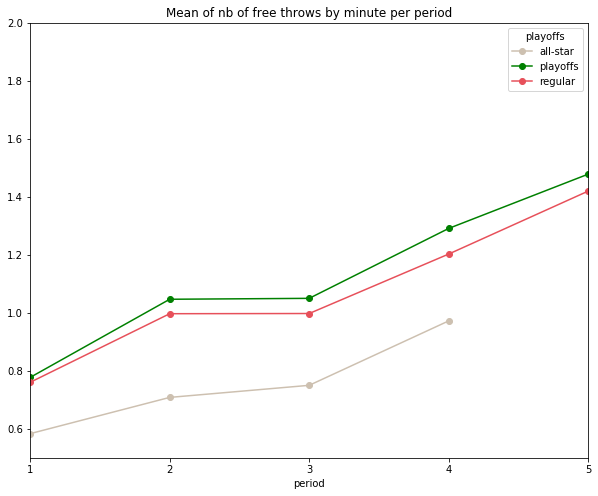

In [46]:
avg_ft_per_min.plot(
    marker="o"
    , xticks=(1,2,3,4,5)
    , xlim=(1, 5)
    , ylim=(0.5,2)
    , figsize=(10,8) 
    ,color=['#cdc0b0','#008000','#e7505a']
    , title="Mean of nb of free throws by minute per period" 
    )
    

We can see in **net increase** of **Mean of nb of free throws** per period between **period 3 and period 5**.

### c.  Analyze per minutes left during a period

In [47]:
# conversion #time# to a float that represent minutes left in the period
df_corr["min_left"] = df_corr["time"].str.split(':').str[0]
df_corr = df_corr.astype({"min_left" : 'int32' })
df_corr["period_type"] = df_corr["period"].apply(lambda x: 'regular period' if x <=4 else 'overtime' )

C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
# Mean of nb of free throws by minutes left in a period
ft_per_minleft = df_corr.groupby( ["min_left","period_type","playoffs"] ).size().unstack()
games_per_minleft = df_corr[["min_left","period_type","playoffs","game_id"]].drop_duplicates().groupby(["min_left","period_type", "playoffs"]).size().unstack()
avg_ft_per_minleft = ft_per_minleft/games_per_minleft
avg_ft_per_minleft = avg_ft_per_minleft.reset_index(level='period_type')
avg_ft_per_minleft

playoffs,period_type,all-star,playoffs,regular
min_left,,,,
0,overtime,NaN,5.000000,5.075117
0,regular period,7.333333,8.094363,7.468304
1,overtime,NaN,2.521739,2.547826
1,regular period,3.666667,5.651015,5.332504
2,overtime,NaN,1.850000,2.292308
2,regular period,2.800000,5.256242,4.889990
3,overtime,NaN,2.111111,2.232026
3,regular period,2.400000,5.088918,4.813876
4,overtime,NaN,2.250000,2.089286


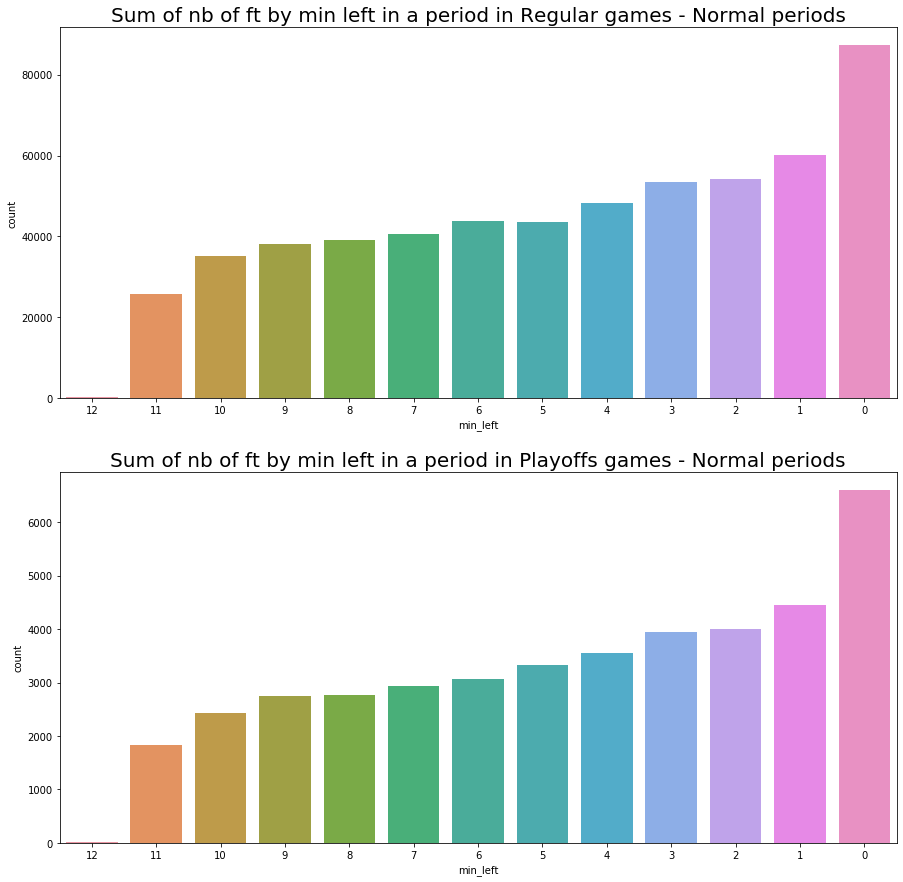

In [49]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].set_title("Sum of nb of ft by min left in a period in Regular games - Normal periods", fontsize=20)
ax[1].set_title("Sum of nb of ft by min left in a period in Playoffs games - Normal periods", fontsize=20)
i = df_corr["min_left"].sort_values(ascending=False).drop_duplicates()
sns.countplot(ax=ax[0]
              , x = "min_left" 
              , data = df_corr.loc[(df_corr["playoffs"] == 'regular') & (df_corr["period_type"] == 'regular period') ]
              , order = i
             )
sns.countplot(ax=ax[1]
              , x = "min_left" 
              , data = df_corr.loc[(df_corr["playoffs"] == 'playoffs')  & (df_corr["period_type"] == 'regular period')]
             , order = i
             )

- We can see an **increased** of **Sum of nb of ft by min left in a period** as **time left**. 
- **The last minute of a periode** is the moment when there is the **more attempt**.

In [50]:
# Mean of nb of free throws by minutes left in a period for regular period
avg_ft_per_minleft[["all-star","playoffs","regular"]].loc[avg_ft_per_minleft["period_type"] == 'regular period']

playoffs,all-star,playoffs,regular
min_left,,,
0,7.333333,8.094363,7.468304
1,3.666667,5.651015,5.332504
2,2.800000,5.256242,4.889990
3,2.400000,5.088918,4.813876
4,3.666667,4.770161,4.473997
5,3.800000,4.430667,4.155230
6,3.400000,4.201094,4.134835
7,4.000000,4.031507,3.930554
8,3.500000,3.831025,3.814446


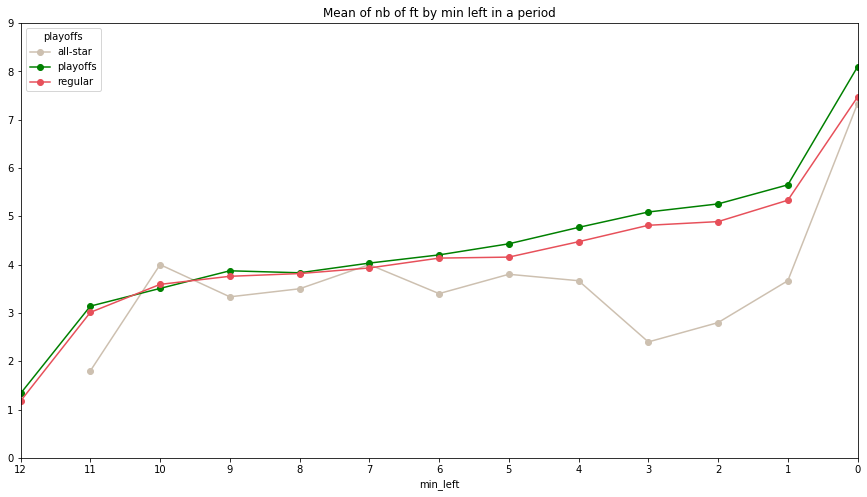

In [51]:
avg_ft_per_minleft[["all-star","playoffs","regular"]].loc[avg_ft_per_minleft["period_type"] == 'regular period'].plot.line(
    figsize=(15, 8)
    , color=['#cdc0b0','#008000','#e7505a']
    ,  marker="o" 
    , title="Mean of nb of free throws by minutes left in a period for regular period" 
    , xticks=sorted(np.arange(0, 13, step=1), reverse=True)
    , yticks=sorted(np.arange(0, 10, step=1), reverse=True)
    )
plt.gca().invert_xaxis()

- We can see a **increased** of **Mean of nb of ft by min left in a period** as **time left** in periode **decreased**. 
- The **last minute of a periode** is the moment when there is the **more attempt**.

### d.  Analyze per minutes left during a match

In [52]:
# Creation of a feature that will represent minutes left during a match
## For overtime, we will let time left during a period
def minleftgames(row):
    if row['period'] <= 3:
        return row['min_left'] + (4-row['period']) * 12
    else:
        return row['min_left']
    ;
df_corr["min_left_match"] = df_corr.apply(minleftgames, axis=1)

In [53]:
ft_per_minleft_match = df_corr.groupby( ["min_left_match","period_type","playoffs"] ).size().unstack()
games_per_minleft_match = df_corr[["min_left_match","period_type","playoffs","game_id"]].drop_duplicates().groupby(["min_left_match","period_type", "playoffs"]).size().unstack()
avg_ft_per_minleft_match = ft_per_minleft_match/games_per_minleft_match
avg_ft_per_minleft_match = avg_ft_per_minleft_match.reset_index(level='period_type')

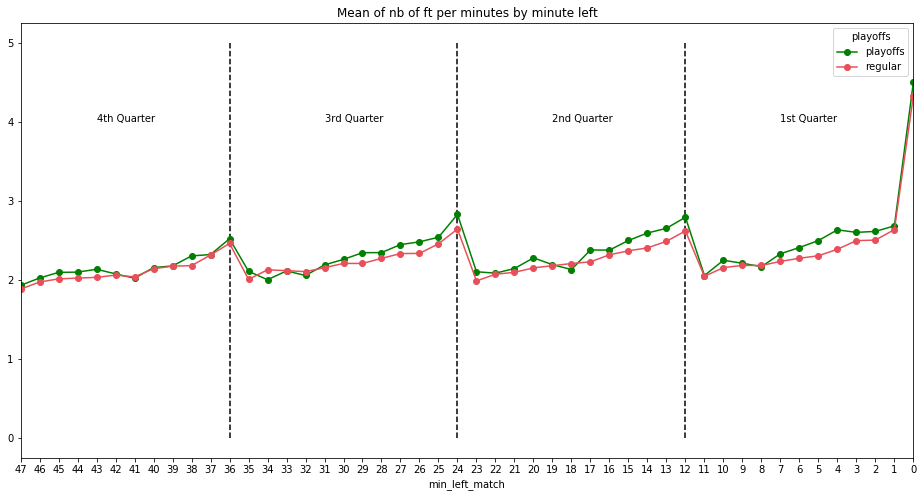

In [55]:
ax = avg_ft_per_minleft_match[["playoffs","regular"]].loc[avg_ft_per_minleft_match["period_type"] == 'regular period'].plot.line(
    figsize=(16, 8)
    , color=['#008000','#e7505a']
    ,  marker="o" 
    , title="Mean of nb of ft per minutes by minute left" 
    , xticks=sorted(np.arange(0, 48, step=1), reverse=True)
    )
ax = plt.vlines([36, 24, 12], 0, 5, linestyle="--")
ax = plt.text(43, 4 , "4th Quarter")
ax = plt.text(31, 4 , "3rd Quarter")
ax = plt.text(19,4 , "2nd Quarter")
ax = plt.text(7,4 , "1st Quarter")
ax = plt.gca().invert_xaxis()

- We can see a **seasonality** for **Mean of nb of ft per minutes by minute left** between **period**
    - The **last minute of a periode** is the moment when there is the **more attempt** in a **period**.
    - The **last minute of a games** is the moment when there is the **more attempt** in a **game**.

In [56]:
# Mean of nb of ft per minutes by minute left
## Focus on the last 5 minutes in a game
ft_per_minleft_match2 = df_corr.loc[df_corr["min_left_match"] <= 5].groupby( ["min_left_match","playoffs","period_type"] ).size().unstack()
games_per_minleft_match2 = df_corr.loc[df_corr["min_left_match"] <= 5][["min_left_match","playoffs","period_type","game_id"]].drop_duplicates().groupby(["min_left_match","playoffs","period_type"]).size().unstack()
avg_ft_per_minleft_match2 = ft_per_minleft_match2/games_per_minleft_match2
avg_ft_per_minleft_match2 = avg_ft_per_minleft_match2.reset_index(level='playoffs')

period_type,playoffs,overtime,regular period
min_left_match,,,
0,all-star,NaN,4.400000
0,playoffs,5.000000,4.500000
0,regular,5.075117,4.330442
1,all-star,NaN,2.500000
1,playoffs,2.521739,2.683983
1,regular,2.547826,2.636809
2,all-star,NaN,2.000000
2,playoffs,1.850000,2.614634
2,regular,2.292308,2.504784


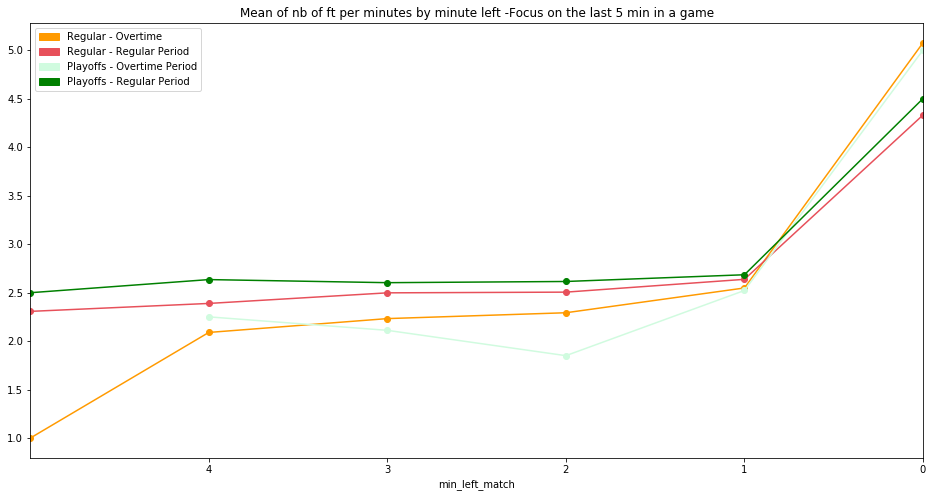

In [58]:
ax = avg_ft_per_minleft_match2[["overtime","regular period"]].loc[ avg_ft_per_minleft_match2["playoffs"] == 'regular'].plot.line(
    figsize=(16, 8) 
    , color=['#ff9a00','#e7505a']
    , marker="o" 
    , title="Mean of nb of ft per minutes by minute left -Focus on the last 5 min in a game" 
    , xticks=sorted(np.arange(0, 5, step=1), reverse=True)
    )


avg_ft_per_minleft_match2[["overtime","regular period"]].loc[ avg_ft_per_minleft_match2["playoffs"] == 'playoffs'].plot.line(
     color=['#d0fbdf','#008000']
    ,ax=ax
    ,  marker="o" 
    , xticks=sorted(np.arange(0, 5, step=1), reverse=True)
    )
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#ff9a00', label='Regular - Overtime')
or_patch = mpatches.Patch(color='#e7505a', label='Regular - Regular Period')
bl_patch = mpatches.Patch(color='#d0fbdf', label='Playoffs - Overtime Period')
gr_patch = mpatches.Patch(color='#008000', label='Playoffs - Regular Period')
plt.legend(handles=[red_patch,or_patch,bl_patch,gr_patch])
ax = ax.set_xlim(5, 0)

- **Mean of nb of ft per minutes by minute left** during the last 5 minutes of a **regular** period is **Higher** than during **overtime**.
    - **Except for the last minute of Overtime.**

## 2c. Shooting Percentages analysis

### a. Analyze per seasons

In [86]:
# Shooting percentage per season
shot_made = df_corr.loc[df_corr["shot_made"] == 1].groupby(["season", "playoffs"]).size().unstack()
pct_shot_made = shot_made / free_throws
pct_shot_made

playoffs,all-star,playoffs,regular
season,,,
2006 - 2007,0.500000,0.742711,0.752639
2007 - 2008,0.500000,0.755246,0.755779
2008 - 2009,0.725000,0.759596,0.770736
2009 - 2010,0.771429,0.752417,0.758927
2010 - 2011,0.796296,0.773716,0.763498
2011 - 2012,0.657895,0.754028,0.752458
2012 - 2013,NaN,0.750613,0.751777
2013 - 2014,NaN,0.763044,0.756084
2014 - 2015,NaN,0.725117,0.750134


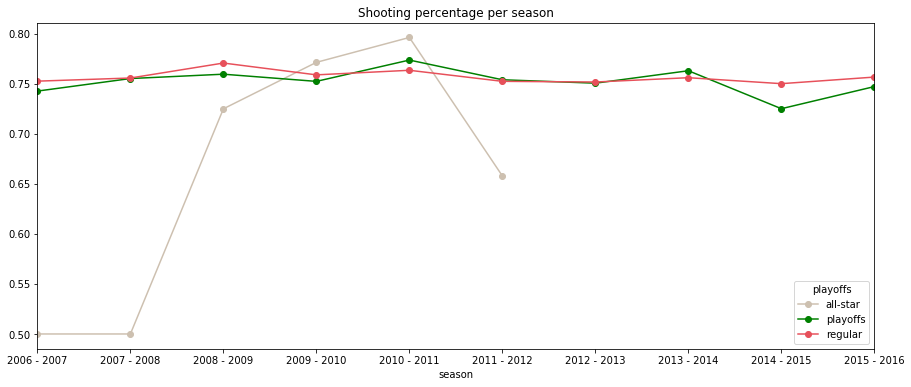

In [87]:
pct_shot_made.plot.line(figsize=(15, 6) , color=['#cdc0b0','#008000','#e7505a'],  marker="o"
    , title="Shooting percentage per season" 
    )

There is not a clear trend fo increase or decrease of Shooting percentage per season by season.

### b. Analyze per period

In [61]:
# Shooting percentage per season by period
shot_made_per_period = df_corr.loc[df_corr["shot_made"] == 1].groupby(["season", "period"]).size().unstack()
free_throws_per_period = df_corr.groupby(["season", "period"]).size().unstack()
pct_shot_made_per_period = shot_made_per_period / free_throws_per_period
pct_shot_made_per_period

period,1,2,3,4,5,6,7,8
season,,,,,,,,
2006 - 2007,0.744387,0.753040,0.752441,0.754251,0.776034,0.781955,0.851852,NaN
2007 - 2008,0.755175,0.745603,0.761491,0.757974,0.799127,0.800000,NaN,NaN
2008 - 2009,0.769611,0.760459,0.776908,0.770510,0.815359,0.848485,0.833333,NaN
2009 - 2010,0.766294,0.754537,0.761292,0.753918,0.763761,0.824561,0.636364,NaN
2010 - 2011,0.766696,0.762025,0.766654,0.761199,0.788026,0.833333,0.956522,NaN
2011 - 2012,0.751849,0.749096,0.762319,0.747103,0.753769,0.781250,0.928571,0.833333
2012 - 2013,0.746178,0.755549,0.753489,0.750242,0.760417,0.764151,0.684211,NaN
2013 - 2014,0.754181,0.748099,0.764649,0.757645,0.791262,0.744681,0.625000,NaN
2014 - 2015,0.749661,0.746868,0.749189,0.748015,0.759863,0.740741,0.785714,NaN


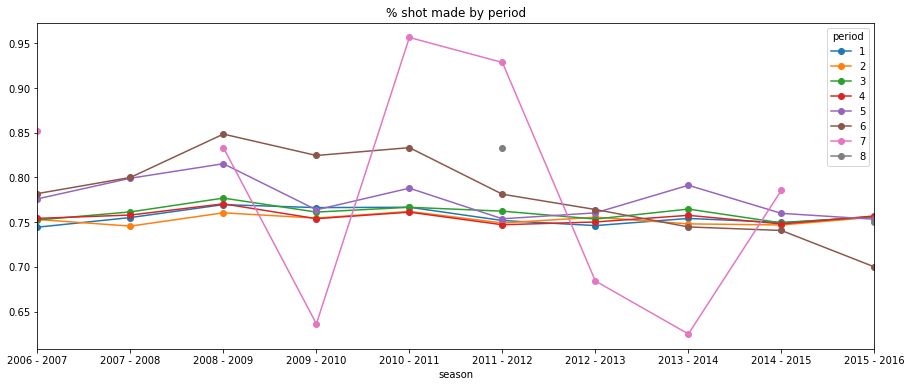

In [62]:
pct_shot_made_per_period.plot.line(figsize=(15, 6) ,   marker="o"
    , title="% shot made by period" 
    )

- There is not a clear trend fo increase or decrease of % shot made by season.
    - Except for period > 6 but, it's due to a low number of games who has period > 6

In [89]:
# Shooting percentage by minutes left in a period
shot_made_per_minleft = df_corr.loc[df_corr["shot_made"] == 1].groupby( ["min_left","period_type","playoffs"] ).size().unstack()
ft_per_minleft = df_corr.groupby( ["min_left","period_type","playoffs"] ).size().unstack()
pct_ft_per_minleft = shot_made_per_minleft/ft_per_minleft
pct_ft_per_minleft = pct_ft_per_minleft.reset_index(level='period_type')
pct_ft_per_minleft

playoffs,period_type,all-star,playoffs,regular
min_left,,,,
0,overtime,NaN,0.795745,0.793401
0,regular period,0.681818,0.770931,0.769637
1,overtime,NaN,0.862069,0.777019
1,regular period,0.545455,0.753649,0.756832
2,overtime,NaN,0.837838,0.716779
2,regular period,0.928571,0.746750,0.752147
3,overtime,NaN,0.719298,0.755490
3,regular period,0.333333,0.751076,0.758045
4,overtime,NaN,0.800000,0.790598


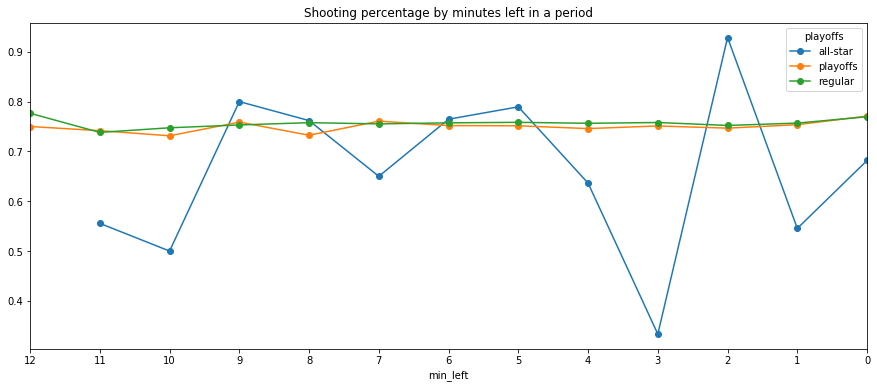

In [90]:
pct_ft_per_minleft.loc[pct_ft_per_minleft["period_type"] == 'regular period'].plot.line(
    figsize=(15, 6) 
    ,   marker="o"
    , title="Shooting percentage by minutes left in a period" 
    , xlim = (12,0)
    ,xticks=sorted(np.arange(0, 13, step=1), reverse=True)
    )

- There is **not a clear trend** of increase or decrease of **shooting_percentage by minute left in a period**.

### d. Analyze per minutes left in a game

In [92]:
# Shooting percentage by minutes left in a period
shot_made_per_min_left_match = df_corr.loc[df_corr["shot_made"] == 1].groupby( ["min_left_match","period_type","playoffs"] ).size().unstack()
ft_per_min_left_match = df_corr.groupby( ["min_left_match","period_type","playoffs"] ).size().unstack()
pct_ft_per_min_left_match = shot_made_per_min_left_match/ft_per_min_left_match
pct_ft_per_min_left_match = pct_ft_per_min_left_match.reset_index(level='period_type')
pct_ft_per_min_left_match

playoffs,period_type,all-star,playoffs,regular
min_left_match,,,,
0,overtime,NaN,0.795745,0.793401
0,regular period,0.772727,0.782577,0.778090
1,overtime,NaN,0.862069,0.777019
1,regular period,0.400000,0.754032,0.755183
2,overtime,NaN,0.837838,0.716779
2,regular period,0.875000,0.727612,0.740253
3,overtime,NaN,0.719298,0.755490
3,regular period,NaN,0.767650,0.754085
4,overtime,NaN,0.800000,0.790598


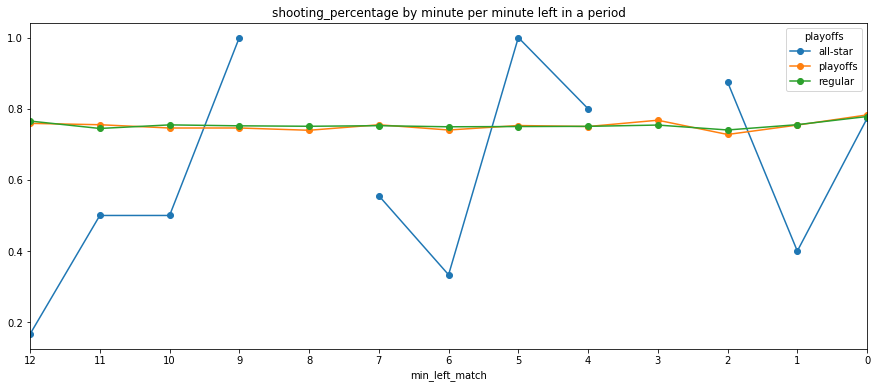

In [93]:
pct_ft_per_min_left_match.loc[pct_ft_per_min_left_match["period_type"] == 'regular period'].plot.line(
    figsize=(15, 6) 
    ,   marker="o"
    , title="shooting_percentage by minute per minute left in a period" 
    , xlim = (12,0)
    ,xticks=sorted(np.arange(0, 13, step=1), reverse=True)
    )

There is **not a clear** trend fo increase or decrease of **shooting_percentage by minute per minute left in a period**.

# 2d. Analyze by players

## a. Overview statistics 

In [69]:
shot_made_by_player = df_corr.loc[df_corr["shot_made"] == 1].groupby(["player", "playoffs"]).size().unstack()
games_by_player = df_corr[["player","game_id" ,"playoffs"]].drop_duplicates().groupby(["player", "playoffs"]).size().unstack()
free_throws_by_player = df_corr.groupby(["player", "playoffs"]).size().unstack()
avg_shot_made_by_player = shot_made_by_player / free_throws_by_player
avg_shot_made_per_game_by_player = shot_made_by_player / games_by_player

C:\Users\Public\Env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Public\Env\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


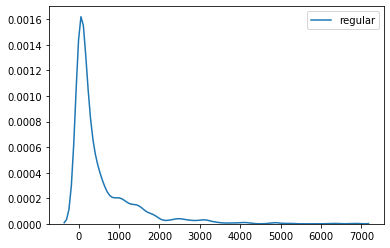

In [70]:
sns.kdeplot(free_throws_by_player["regular"])

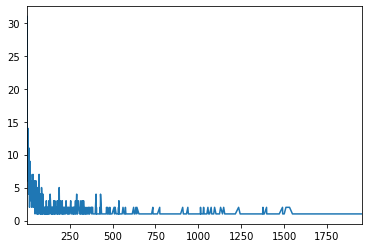

In [71]:
free_throws_by_player[free_throws_by_player["regular"] < 2000]["regular"].value_counts().sort_index().plot.line()

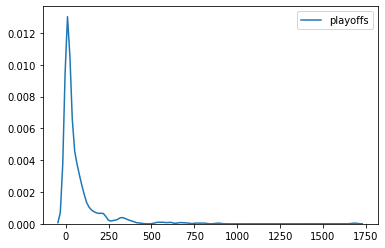

In [72]:
sns.kdeplot(free_throws_by_player["playoffs"])

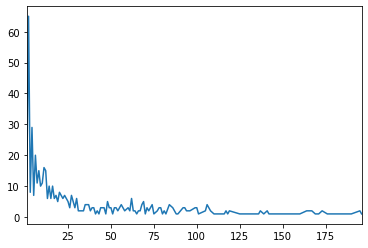

In [73]:
free_throws_by_player[free_throws_by_player["playoffs"] < 200]["playoffs"].value_counts().sort_index().plot.line()

- We can see that **majority of the players in the dataset** have attempt **at least 100 free throws** in **regular** games.
- We can see that **majority of the players in the dataset** have attempt **at least 15 free throws** in **playoffs** games.

### b. Shooting precision by player

In [74]:
shot_made_by_player = df_corr.loc[df_corr["shot_made"] == 1].groupby(["player", "playoffs"]).size().unstack()
games_by_player = df_corr[["player","game_id" ,"playoffs"]].drop_duplicates().groupby(["player", "playoffs"]).size().unstack()
free_throws_by_player = df_corr.groupby(["player", "playoffs"]).size().unstack()
pct_shot_made_by_player = shot_made_by_player / free_throws_by_player
avg_shot_made_per_game_by_player = shot_made_by_player / games_by_player
free_throws_by_player = free_throws_by_player.reset_index()

In [75]:
# Creation of list of player to keep for analysis
list_player_regular = free_throws_by_player["player"].loc[free_throws_by_player["regular"] >= 100]
list_player_playoffs = free_throws_by_player["player"].loc[free_throws_by_player["playoffs"] >= 15]

In [95]:
# Shooting precision by player for regular season
pct_shot_made_by_player_regular = pd.merge(pct_shot_made_by_player, list_player_regular, how='inner', on=['player'])
pct_shot_made_by_player_regular.sort_values(by=['regular', 'playoffs'], ascending=False).head(5)

,player,all-star,playoffs,regular
85,Brian Roberts,NaN,0.666667,0.915408
596,Steve Nash,NaN,0.902256,0.914952
524,Ray Allen,0.714286,0.882353,0.908925
105,Chauncey Billups,0.666667,0.860526,0.908299
506,Peja Stojakovic,NaN,0.897959,0.901478


- The **top 5** players who have the **highest shooting percentages** for **regular** season are:
    - rank 1: **Brian Roberts**
    - rank 2: **Steve Nash**
    - rank 3: **Ray Allen**
    - rank 4: **Chauncey Billups**
    - rank 5: **Brian Roberts**
- We can see that they have also a high shooting percentage of shoot for playoffs season

In [96]:
# Shooting precision by player for playoffs
pct_shot_made_by_player_playoffs = pd.merge(pct_shot_made_by_player, list_player_playoffs, how='inner', on=['player'])
pct_shot_made_by_player_playoffs.sort_values(by=['regular', 'playoffs'], ascending=False).head(5)

,player,all-star,playoffs,regular
324,Steve Nash,NaN,0.902256,0.914952
286,Ray Allen,0.714286,0.882353,0.908925
61,Chauncey Billups,0.666667,0.860526,0.908299
276,Peja Stojakovic,NaN,0.897959,0.901478
321,Stephen Curry,NaN,0.877698,0.900594


- The **top 5** players who have the **highest shooting percentages** for **playoffs** season are:
    - rank 1: **Steve Nash** *(rank 2 for regular season)*
    - rank 2: **Ray Allen** *(rank 3 for regular season)*
    - rank 3: **Chauncey Billups**
    - rank 4: **Peja Stojakovic** 	
    - rank 5: **Stephen Curry**
- We can see that they have also a high shooting percentage of shoot for playoffs season

Text(0.73, -1.5, 'median')

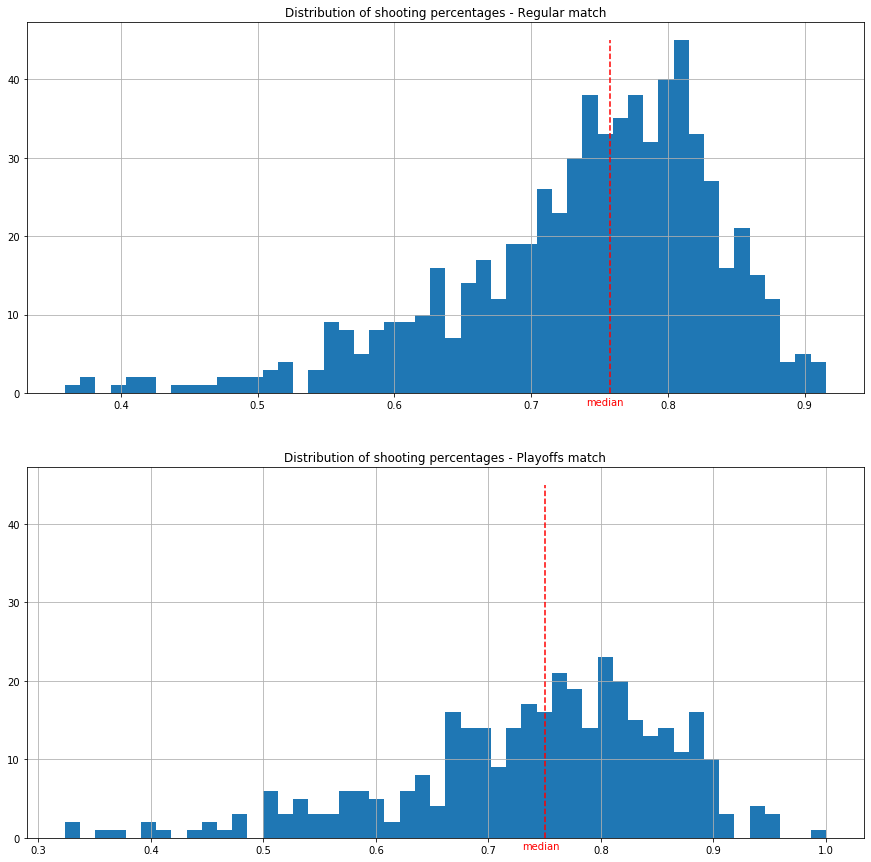

In [97]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].set_title("Distribution of shooting percentages - Regular match")
ax[1].set_title("Distribution of shooting percentages - Playoffs match")
pct_shot_made_by_player_regular["regular"].hist(ax = ax[0] , bins=50)
ax[0].vlines(x=pct_shot_made_by_player_regular["regular"].median(), ymin=0, ymax=45, color="red", linestyle="--")
ax[0].text(x=0.74, y=-1.5, s="median", color="red")
pct_shot_made_by_player_playoffs["playoffs"].hist(ax = ax[1] , bins=50)
ax[1].vlines(x=pct_shot_made_by_player_regular["playoffs"].median(), ymin=0, ymax=45, color="red", linestyle="--")
ax[1].text(x=0.73, y=-1.5, s="median", color="red")

The distribution of shooting percentages looklike a **normal distribution left-skewed** for **regular** and **playoffs** games.
- *For regular games*
    - The best shooting percentages is above 90%
    - The median shooting percentages is 76%
- *For playoffs games*
    - The best shooting percentages is above 90%
    - The median shooting percentages is 75%

### c. Number of Free Throws made by player per game 

In [80]:
# mean of shot made per game by player in regular season
avg_shot_made_per_game_by_player_regular = pd.merge(avg_shot_made_per_game_by_player, list_player_regular, how='inner', on=['player'])
avg_shot_made_per_game_by_player_regular.sort_values(by=['regular', 'playoffs'], ascending=False)

,player,all-star,playoffs,regular
373,Kevin Durant,6.500000,7.494505,7.252366
281,James Harden,NaN,7.086957,6.817647
18,Allen Iverson,1.000000,5.875000,6.726457
384,Kobe Bryant,5.333333,7.109890,6.610475
124,Corey Maggette,NaN,NaN,6.488950
...,...,...,...,...
410,Lou Amundson,NaN,NaN,1.158730
395,Kyrylo Fesenko,NaN,1.000000,1.122449
159,DeSagana Diop,NaN,1.500000,1.084906
328,Joey Dorsey,NaN,1.000000,1.071429


In [81]:
# mean of shot made per game by player in playoffs
avg_shot_made_per_game_by_player_playoffs = pd.merge(avg_shot_made_per_game_by_player, list_player_playoffs, how='inner', on=['player'])
avg_shot_made_per_game_by_player_playoffs.sort_values(by=['regular', 'playoffs'], ascending=False)

,player,all-star,playoffs,regular
192,Kevin Durant,6.500000,7.494505,7.252366
146,James Harden,NaN,7.086957,6.817647
7,Allen Iverson,1.000000,5.875000,6.726457
200,Kobe Bryant,5.333333,7.109890,6.610475
212,LeBron James,3.600000,6.885246,6.305930
...,...,...,...,...
217,Louis Amundson,NaN,1.083333,1.317568
16,Andre Roberson,NaN,1.333333,1.312500
116,Fabricio Oberto,NaN,1.533333,1.303797
66,Clint Capela,NaN,1.214286,1.292308


Text(2.3, -1.5, 'median')

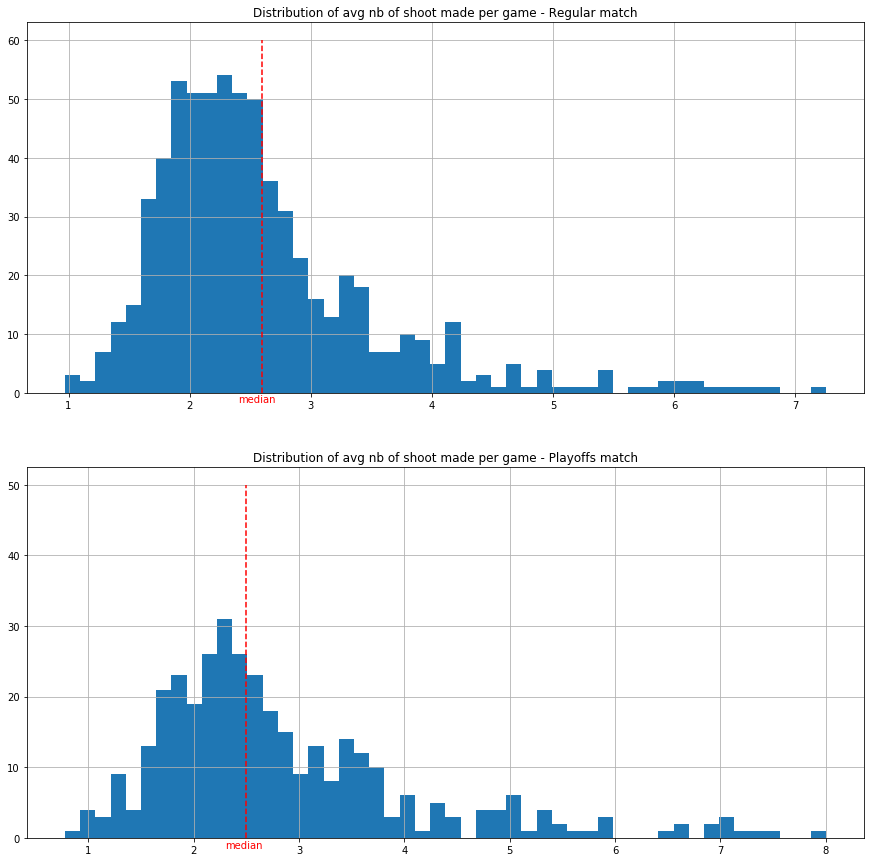

In [82]:
fig, ax = plt.subplots(2,1, figsize=(15,15))
ax[0].set_title("Distribution of avg nb of shoot made per game - Regular match")
ax[1].set_title("Distribution of avg nb of shoot made per game - Playoffs match")
avg_shot_made_per_game_by_player_regular["regular"].hist(ax = ax[0] , bins=50)
ax[0].vlines(x=avg_shot_made_per_game_by_player_playoffs["regular"].median(), ymin=0, ymax=60, color="red", linestyle="--")
ax[0].text(x=2.4, y=-1.5, s="median", color="red")
avg_shot_made_per_game_by_player_playoffs["playoffs"].hist(ax = ax[1] , bins=50)
ax[1].vlines(x=avg_shot_made_per_game_by_player_playoffs["playoffs"].median(), ymin=0, ymax=50, color="red", linestyle="--")
ax[1].text(x=2.3, y=-1.5, s="median", color="red")

The **distribution of avg nb of shoot made per game per player** looklike a **normal distribution** **right-skewed** for **regular** and **playoffs** games.
- For *regular games*
    - The best avg nb of shoot made per game is above 4
    - The median shooting percentages is 2,6
- For *playoffs games*
    - The best shooting percentages is above 4
    - The median shooting percentages is 2,4

#### d. Best progression in shooting precision season 2006-2007 vs 2015-2016 

In [98]:
shot_made_by_player_by_season = df_corr.loc[df_corr["shot_made"] == 1].groupby(["player", "playoffs","season"]).size().unstack()

In [99]:
games_by_player_by_season = df_corr[["player","game_id" ,"playoffs","season"]].drop_duplicates().groupby(["player", "playoffs","season"]).size().unstack()
free_throws_by_player_by_season = df_corr.groupby(["player", "playoffs","season"]).size().unstack()
pct_shot_made_by_player_by_season = shot_made_by_player_by_season / free_throws_by_player_by_season
avg_shot_made_per_game_by_player_by_season = shot_made_by_player_by_season / games_by_player_by_season
free_throws_by_player_by_season = free_throws_by_player_by_season.reset_index()
pct_shot_made_by_player_by_season = pct_shot_made_by_player_by_season.reset_index()

In [100]:
# List of players that have played at least 10 attempt per season
games_by_player_by_season = games_by_player_by_season.reset_index()
games_by_player_by_season_regular = games_by_player_by_season[["player"]].loc[(games_by_player_by_season["playoffs"] == 'regular') & (games_by_player_by_season["2006 - 2007"] >= 10 )& (games_by_player_by_season["2015 - 2016"] >= 10 )]
pct_shot_made_by_player_by_season["Delta"] = pct_shot_made_by_player_by_season["2015 - 2016"] - pct_shot_made_by_player_by_season["2006 - 2007"]
delta_pct_shot_made_by_player_by_season = pct_shot_made_by_player_by_season.loc[(pct_shot_made_by_player_by_season["playoffs"] == 'regular') ].sort_values(by=['Delta'], ascending=False)

In [101]:
# Shooting precision per player by game
delta_pct_shot_made_by_player_by_season = pd.merge(delta_pct_shot_made_by_player_by_season, games_by_player_by_season_regular, how='inner', on=['player'])
delta_pct_shot_made_by_player_by_season.sort_values(by=['Delta'], ascending=False)

season,player,playoffs,2006 - 2007,2007 - 2008,2008 - 2009,2009 - 2010,2010 - 2011,2011 - 2012,2012 - 2013,2013 - 2014,2014 - 2015,2015 - 2016,Delta
0,Trevor Ariza,regular,0.619883,0.671233,0.710059,0.649123,0.700508,0.774510,0.821053,0.772021,0.853147,0.782609,0.162726
1,Shaun Livingston,regular,0.706897,NaN,0.900000,0.875000,0.864000,0.784810,0.867347,0.827225,0.714286,0.860215,0.153319
2,C.J. Miles,regular,0.608696,0.788462,0.876404,0.694737,0.811224,0.794118,0.866667,0.853333,0.807453,0.750000,0.141304
3,Louis Williams,regular,0.695652,0.782759,NaN,NaN,NaN,NaN,0.867769,0.849162,0.860759,0.830189,0.134537
4,Kris Humphries,regular,0.670886,0.604839,0.791667,0.668421,0.664921,0.751799,0.788618,0.812500,0.743590,0.797619,0.126733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Josh Smith,regular,0.702918,0.712418,0.587744,0.618483,0.724684,0.630435,0.517134,0.531773,0.498039,0.552239,-0.150679
70,Kendrick Perkins,regular,0.600000,0.622951,0.600000,0.582143,0.555556,0.651786,0.611111,0.552239,0.506024,0.440000,-0.160000
71,Kevin Garnett,regular,0.837782,0.800595,0.840909,0.837104,0.861751,0.857143,0.786070,0.808511,0.800000,0.666667,-0.171116
72,J.R. Smith,regular,0.808000,0.724138,0.753676,0.710000,0.737557,0.709091,0.764516,0.652174,0.750000,0.633803,-0.174197


- The **best progression of shooting precision** between 2006 and 2016 in regular match:
    - rank 1: **"Trevor Ariza"** (+16 percentage points)
    - rank 2: **"Shaun Livingston"** (+15 percentage points)
    - rank 3: **"C.J. Miles"** (+14 percentage points)
    - rank 4: **"Louis Williams"** (+13 percentage points)
    - rank 5: **"Kris Humphries"** (+12 percentage points)
- The **worst evolution of shooting precision** between 2006 and 2016 in regular match:
    - rank 1: **"Andre Iguodala"** (-21 percentage points)
    - rank 2: **"J.R. Smith"** (-17 percentage points)
    - rank 3: **"Kevin Garnett"** (-17 percentage points)
    - rank 4: **"Kendrick Perkins"** (-16 percentage points)
    - rank 5: **"Josh Smith"** (-15 percentage points)    

### e. More consistent in shooting precision between 2006 and 2016

In [106]:
std_shooting_by_player_per_season_regular = df_corr.loc[df_corr["playoffs"] == 'regular'].groupby(["player", "season"])["shot_made"].agg(["mean", "size"])
std_shooting_by_player_per_season_regular = std_shooting_by_player_per_season_regular.drop("size", axis=1).unstack("player")
std_shooting_by_player_per_season_regular.columns = std_shooting_by_player_per_season_regular.columns.droplevel()
std_shooting_by_player_per_season_regular = std_shooting_by_player_per_season_regular.dropna(axis=1)
std_shooting_by_player_per_season_regular = std_shooting_by_player_per_season_regular.std()
std_shooting_by_player_per_season_regular = pd.DataFrame({"std": std_shooting_by_player_per_season_regular})
std_shooting_by_player_per_season_regular = std_shooting_by_player_per_season_regular.reset_index()
std_shooting_by_player_per_season_regular = pd.merge(std_shooting_by_player_per_season_regular, pct_shot_made_by_player_regular[["player","regular"]], how='inner', on=['player'])
std_shooting_by_player_per_season_regular.rename(columns={'regular': 'shooting_percentage'}, inplace=True)
std_shooting_by_player_per_season_regular.sort_values(by=["std"], ascending=True)

,player,std,shooting_percentage
22,Dirk Nowitzki,0.014717,0.893279
39,Kevin Martin,0.015683,0.874704
32,Jarrett Jack,0.018448,0.859971
41,Kobe Bryant,0.018715,0.839534
48,Luol Deng,0.019121,0.774353
...,...,...,...
31,James Jones,0.121819,0.843091
13,Charlie Villanueva,0.134961,0.781797
56,Nazr Mohammed,0.167941,0.607029
17,Chuck Hayes,0.176621,0.615551


- The **best consistent player** for shooting precision between 2006 and 2016 in regular match are:
    - rank 1: **"Dirk Nowitzki"**
    - rank 2: **"Kevin Martin" **
    - rank 3: **"Jarrett Jack"** 	
    - rank 4: **"Kobe Bryant"** 
    - rank 5: **"Luol Deng" **

Text(0.5, 1.0, 'Consistency of Shooting in relation to Shooting Percentage')

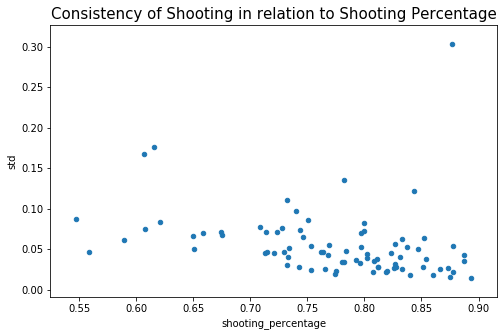

In [107]:
std_shooting_by_player_per_season_regular.plot(kind="scatter", x="shooting_percentage", y="std", figsize=(8,5))
plt.title("Consistency of Shooting in relation to Shooting Percentage", fontsize=15)

- We can see a **negative correlation** between **shooting percentage** and **standard deviation**.

## 2.F Analyze under effect

### a. Relation between score and free throws made

In [116]:
# We dont't have information of player's team

## We will apply 2 rules
##### A player will be affected to a team for a season if it's the team he is most appeared
##### In case of equality, a player will be affected to at team that he is scored for


######## A player will be affected to a team for a season if it's the team he is most appeared
play_dom = df_corr[["season","dom","game_id","player"]].drop_duplicates()
play_visit = df_corr[["season","visit","game_id","player"]].drop_duplicates()
play_dom.rename(columns={"dom": 'team'}, inplace=True)
play_visit.rename(columns={"visit": 'team'}, inplace=True)
frames = [play_dom, play_visit]
play_team = pd.concat(frames)
play_team = play_team.groupby(["player", "season" ,"team" ]).agg([ "size"])
play_team.columns = play_team.columns.droplevel()

idx = play_team.groupby(["player", "season"])['size'].transform(max) == play_team['size']
play_team = play_team[idx]
play_team.reset_index()
verif_play_team = play_team.groupby(["player", "season" ]).agg([ "size"])
verif_play_team.columns = verif_play_team.columns.droplevel()
play_team_fin = verif_play_team.loc[verif_play_team["size"] ==1].reset_index()
play_team = play_team.reset_index()
play_team = pd.merge(play_team, play_team_fin, how='inner', on=['player','season'] )[["player", "season","team"]]
####### In case of equality, a player will be affected to at team that he is scored for
df_corr["score_dom"] = df_corr["score"].str.split(' - ').str[0]
df_corr["score_visit"] = df_corr["score"].str.split(' - ').str[1]
player_without_team = verif_play_team.loc[verif_play_team["size"] > 1].reset_index()
player_without_team = pd.merge(df_corr, player_without_team[["player","season"]], how='inner', on=["player","season"] )[["season","dom","visit","game_id","period","time","player","score_dom","score_visit"]]
score = player_without_team.drop_duplicates()
score2 = score[["season","dom","visit","game_id","period","time","player","score_dom","score_visit"]].groupby(["season","dom","visit","game_id","period","time","player" ]).agg(["min","max"])
score2.columns = score2.columns.droplevel()
score2.columns = ['min_score_dom','max_score_dom','min_score_visit','max_score_visit']
score2 = score2.astype({"min_score_dom" : 'int32' , "max_score_dom" : 'int32' , "min_score_visit" : 'int32', "max_score_visit" : 'int32'})
score2["delta_score_dom"] = score2["max_score_dom"] - score2["min_score_dom"]
score2["delta_score_visit"] = score2["max_score_visit"] - score2["min_score_visit"]
score2 = score2.reset_index()[["season" , "period" , "time" , "player","dom","visit","delta_score_dom","delta_score_visit"]]
play_team_dom = score2[["season","dom","player"]].loc[score2["delta_score_dom"] > 0].drop_duplicates()
play_team_dom.columns = ['season','team','player']
play_team_visit = score2[["season","visit","player"]].loc[score2["delta_score_visit"] > 0].drop_duplicates()
play_team_visit.columns = ['season','team','player']
frames = [play_team_dom, play_team_visit]
play_team_v2 = pd.concat(frames)
verif_play_team_2 = play_team_v2.groupby(["season","player"]).agg(["size"])
verif_play_team_2.columns = verif_play_team_2.columns.droplevel()
verif_play_team_2 = verif_play_team_2[verif_play_team_2["size"] == 1]
verif_play_team_2 = verif_play_team_2.reset_index()
play_team_v2 = play_team_v2.reset_index()
play_team_v2 = pd.merge(play_team_v2, verif_play_team_2, how='inner', on=['player','season'] )[["player", "season","team"]]

####### UNION 
play_team_final = [play_team[['season','team','player']], play_team_v2[['season','team','player']]]
play_team_final = pd.concat(play_team_final)
play_team_final = play_team_final.drop_duplicates()

In [117]:
df_corr_v2 = pd.merge(df_corr, play_team_final, how='left', on=['season','player'] )
df_corr_v2 = df_corr_v2.astype({"score_dom" : 'int32' , "score_visit" : 'int32' })

In [120]:
df_corr_v2_dom = df_corr_v2[df_corr_v2["dom"] == df_corr_v2["team"]]
df_corr_v2_visit = df_corr_v2[df_corr_v2["visit"] == df_corr_v2["team"]]
df_corr_v2_dom["type_games"] = 'dom'
df_corr_v2_dom["score_dom"] = df_corr_v2_dom["score_dom"] - df_corr_v2_dom["shot_made"]
df_corr_v2_visit["type_games"] = 'visit'
df_corr_v2_visit["score_dom"] = df_corr_v2_visit["score_visit"] - df_corr_v2_visit["shot_made"]

C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [121]:
def lead_dom(x):
    if x["score_dom"] > x["score_visit"]:
        return 'lead'
    elif x["score_dom"] < x["score_visit"]:
        return 'be lead'
    else:
        return 'equality'
def lead_visit(x):
    if x["score_dom"] < x["score_visit"]:
        return 'lead'
    elif x["score_dom"] > x["score_visit"]:
        return 'be lead'
    else:
        return 'equality'    

In [122]:
df_corr_v2_dom["lead"] = df_corr_v2_dom.apply(lambda x: lead_dom(x) , axis=1 )
df_corr_v2_visit["lead"] = df_corr_v2_visit.apply(lambda x: lead_visit(x) , axis=1 )

C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Public\Env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [123]:
df_corr_v2 = [df_corr_v2_dom, df_corr_v2_visit]
df_corr_v2 = pd.concat(df_corr_v2)

In [124]:
df_corr_v2["lead"].loc[df_corr_v2["shot_made"] == 1].value_counts() / df_corr_v2["lead"].value_counts()

lead        0.919095
be lead     0.754440
equality    0.110289
Name: lead, dtype: float64

In [125]:
lead = df_corr_v2.groupby(["playoffs","lead"]).size().unstack()
lead_shot = df_corr_v2.loc[df_corr_v2["shot_made"] == 1].groupby(["playoffs","lead"]).size().unstack()
pct_lead_shot = lead_shot/lead

In [126]:
pct_lead_shot

lead,be lead,equality,lead
playoffs,,,
playoffs,0.752333,0.098355,0.92309
regular,0.754602,0.111181,0.91881


- Players that team **lead** the game have a **higher percentage shot** than team to be lead.
- Players that team are **equality score** with other time have a **very low of percentage shot**.